In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(device=gpu, enable=True)   
#GPU内存管理

In [3]:
train_dir = 'sat2/train'
test_dir = 'sat2/val'

im_size = 224
batch_size = 16

In [4]:
train_images = ImageDataGenerator(rescale = 1/255,horizontal_flip=True)
test_images = ImageDataGenerator(rescale = 1/255)
#归一化

In [5]:
train_gen = train_images.flow_from_directory(directory=train_dir,
                                             batch_size=batch_size,
                                             shuffle=True,
                                             target_size=(im_size, im_size),
                                             class_mode='categorical')
#按路径载入图片，批处理大小，随机，尺寸，读热编码

Found 3150 images belonging to 5 classes.


In [6]:
val_gen = test_images.flow_from_directory(directory=test_dir,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          target_size=(im_size, im_size),
                                          class_mode='categorical')
#按路径载入图片，批处理大小，随机，尺寸，读热编码

Found 350 images belonging to 5 classes.


In [7]:
classes = train_gen.class_indices
#类别查看

In [8]:
classes

{'airplane': 0, 'bridge': 1, 'palace': 2, 'ship': 3, 'stadium': 4}

In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(tf.keras.layers.ZeroPadding2D(((1,2),(1,2)),input_shape=(224,224,3)))
model.add(tf.keras.layers.Conv2D(filters = 48,
                                 kernel_size = (11,11),
                                 strides = 4,
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (3, 3),strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128,
                                 kernel_size = (5,5),
                                 padding = 'same',
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (3, 3),strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 192,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
model.add(tf.keras.layers.Conv2D(filters = 192,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
model.add(tf.keras.layers.Conv2D(filters = 128,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (3, 3),strides = 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 48)        17472     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 128)       153728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 192)       221376    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 192)       3

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['acc'])
#学习率设置

In [13]:
history = model.fit(train_gen,epochs=15,validation_data=val_gen)

Epoch 1/15
197/197 [==============================] - 8s 27ms/step - loss: 1.5485 - acc: 0.2477 - val_loss: 1.3282 - val_acc: 0.4171
Epoch 2/15
197/197 [==============================] - 5s 24ms/step - loss: 1.3157 - acc: 0.3827 - val_loss: 1.2053 - val_acc: 0.4000
Epoch 3/15
197/197 [==============================] - 5s 24ms/step - loss: 1.2264 - acc: 0.4284 - val_loss: 1.1158 - val_acc: 0.4743
Epoch 4/15
197/197 [==============================] - 5s 25ms/step - loss: 1.0942 - acc: 0.5332 - val_loss: 0.9777 - val_acc: 0.5971
Epoch 5/15
197/197 [==============================] - 5s 25ms/step - loss: 0.9910 - acc: 0.6019 - val_loss: 0.9252 - val_acc: 0.6314
Epoch 6/15
197/197 [==============================] - 5s 25ms/step - loss: 0.8401 - acc: 0.6822 - val_loss: 0.8027 - val_acc: 0.7000
Epoch 7/15
197/197 [==============================] - 5s 25ms/step - loss: 0.7476 - acc: 0.7219 - val_loss: 0.7385 - val_acc: 0.7114
Epoch 8/15
197/197 [==============================] - 5s 25ms/step - 

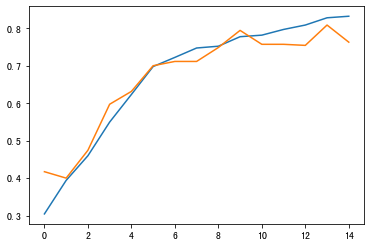

In [14]:
plt.plot(history.epoch,history.history.get('acc'))
plt.plot(history.epoch,history.history.get('val_acc'))

In [15]:
model.evaluate(val_gen)

22/22 [==============================] - 0s 20ms/step - loss: 0.6010 - acc: 0.7629


[0.6009547710418701, 0.7628571391105652]

In [16]:
# 保存模型
model.save('sat2.h5')